In [1]:
# Import python libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("heath_insurance.csv")

In [3]:
# Load the dataset
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [4]:
# Calculate Descriptive statistics
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [5]:
# Inspect the first 5 rows of the dataset
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [6]:
# Check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [7]:
# Find missing values in the dataset
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [8]:
# Find duplicated rows in the dataset
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
50877    False
50878    False
50879    False
50880    False
50881    False
Length: 50882, dtype: bool

In [9]:
# Calculate the total of duplicated rows 
df.duplicated().sum()

0

In [10]:
# Drop ID (not predictive)
df = df.drop(columns=['ID'])

In [11]:
# Show top 5 rows 
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [12]:
# Check target distribution
df['Response'].value_counts(normalize=True)

Response
0    0.760053
1    0.239947
Name: proportion, dtype: float64

In [13]:
# Check target distribution
df['Accomodation_Type'].value_counts(normalize=True)

Accomodation_Type
Owned     0.54933
Rented    0.45067
Name: proportion, dtype: float64

In [14]:
# Check target distribution
df['Reco_Insurance_Type'].value_counts(normalize=True)

Reco_Insurance_Type
Individual    0.796667
Joint         0.203333
Name: proportion, dtype: float64

In [15]:
# Check target distribution
df['Is_Spouse'].value_counts(normalize=True)

Is_Spouse
No     0.83448
Yes    0.16552
Name: proportion, dtype: float64

In [16]:
# Check target distribution
df['Health Indicator'].value_counts(normalize=True)

Health Indicator
X1    0.331964
X2    0.263632
X3    0.172540
X4    0.146539
X5    0.044066
X6    0.032661
X7    0.005001
X8    0.001990
X9    0.001608
Name: proportion, dtype: float64

In [17]:
# Check target distribution
df['Holding_Policy_Duration'].value_counts(normalize=True)

Holding_Policy_Duration
1.0     0.146877
14+     0.141523
2.0     0.139075
3.0     0.117071
4.0     0.090464
5.0     0.077111
6.0     0.061833
7.0     0.053704
8.0     0.042963
9.0     0.036368
10.0    0.026542
11.0    0.017825
12.0    0.016748
13.0    0.016682
14.0    0.015213
Name: proportion, dtype: float64

In [18]:
# Check target distribution
df['Holding_Policy_Type'].value_counts(normalize=True)

Holding_Policy_Type
3.0    0.433515
1.0    0.266821
2.0    0.163397
4.0    0.136267
Name: proportion, dtype: float64

In [19]:
# Find missing values in the dataset
df.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [20]:
# CLEAN HEALTH INDICATOR (categorical)
df['Health Indicator'] = df['Health Indicator'].fillna('Missing')

In [21]:
# CLEAN HOLDING POLICY DURATION
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype(str).str.replace('+', '', regex=False)
df['Holding_Policy_Duration'] = pd.to_numeric(df['Holding_Policy_Duration'], errors='coerce')
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].median())


In [22]:
# CLEAN HOLDING POLICY TYPE
df['Holding_Policy_Type'] = df['Holding_Policy_Type'].fillna(0)

In [23]:
# VERIFY missing values
df.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

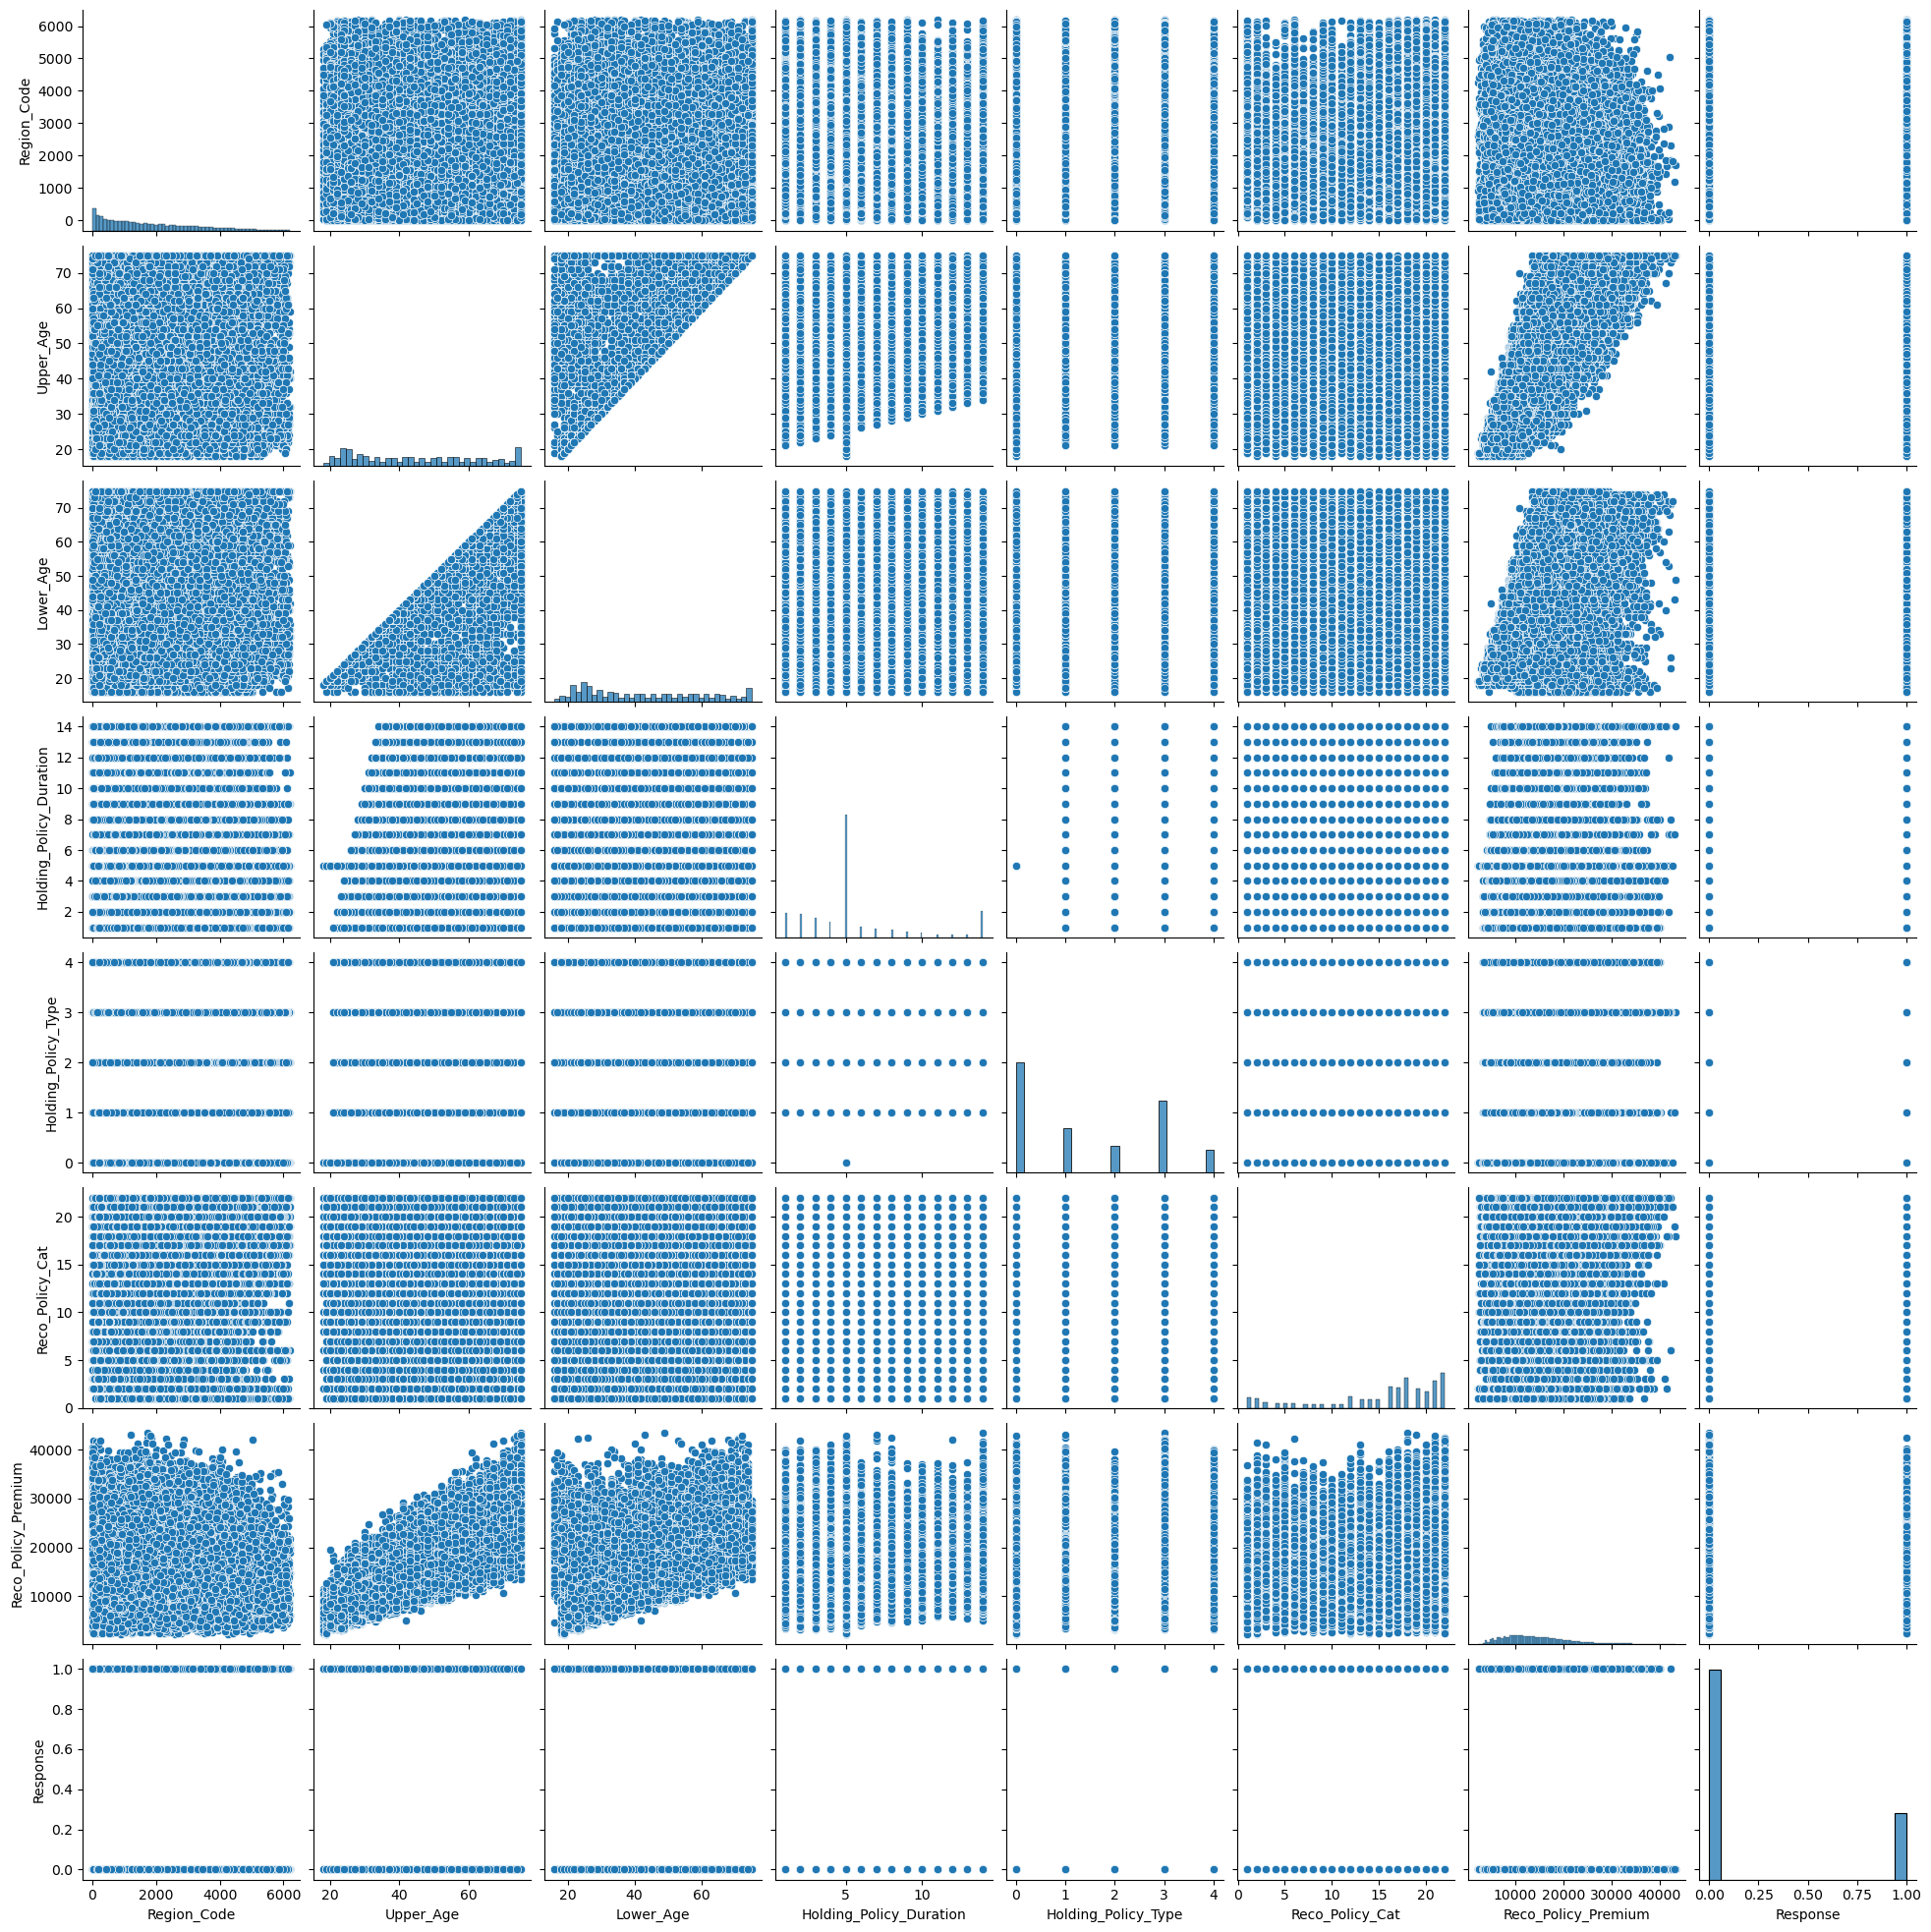

In [24]:
# Describe the dataset using visualizations
sns.pairplot(df)

In [25]:
# Conversion rate by recommended insurance type
df.groupby('Reco_Insurance_Type')['Response'].mean().sort_values(ascending=False)


Reco_Insurance_Type
Joint         0.248309
Individual    0.237813
Name: Response, dtype: float64

In [26]:
# Conversion rate by policy category
df.groupby('Reco_Policy_Cat')['Response'].mean().sort_values(ascending=False)

Reco_Policy_Cat
15    0.465635
22    0.328385
12    0.315037
17    0.298456
5     0.290963
19    0.276969
8     0.269330
20    0.254958
14    0.243972
16    0.223555
18    0.220601
13    0.218527
21    0.193754
3     0.193579
7     0.185851
10    0.176623
6     0.172738
11    0.166453
9     0.166033
2     0.132499
4     0.073892
1     0.004067
Name: Response, dtype: float64

In [27]:
# Conversion rate by premium amount
df.groupby('Reco_Policy_Premium')['Response'].mean().head()

Reco_Policy_Premium
2280.0    0.0
2304.0    0.0
2380.0    0.0
2400.0    0.0
2408.0    0.5
Name: Response, dtype: float64

##### CHECK FOR OUTLIERS

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         50882 non-null  object 
 8   Holding_Policy_Duration  50882 non-null  float64
 9   Holding_Policy_Type      50882 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.0+ MB


In [30]:
# Calculate IQR for premium
Q1 = df['Region_Code'].quantile(0.25)
Q3 = df['Region_Code'].quantile(0.75)
IQR1 = Q3 - Q1

In [31]:
IQR1

2144.0

In [32]:
# Count outliers
((df['Region_Code'] < (Q1 - 1.5*IQR1)) | 
 (df['Region_Code'] > (Q3 + 1.5*IQR1))).sum()

201

In [33]:
# Calculate IQR for premium
Q1 = df['Reco_Policy_Premium'].quantile(0.25)
Q3 = df['Reco_Policy_Premium'].quantile(0.75)
IQR = Q3 - Q1

In [34]:
IQR

8848.0

In [35]:
# Count outliers
((df['Reco_Policy_Premium'] < (Q1 - 1.5*IQR)) | 
 (df['Reco_Policy_Premium'] > (Q3 + 1.5*IQR))).sum()

821

In [36]:
# Create age groups
df['Age_Group'] = pd.cut(df['Upper_Age'], bins=[0, 25, 35, 45, 60, 120],labels=['≤25', '26–35', '36–45', '46–60', '60+'])

In [37]:
# View age groups distribution
df['Age_Group'].value_counts()

Age_Group
46–60    12170
60+      11884
26–35    10109
≤25       9047
36–45     7672
Name: count, dtype: int64

In [38]:
# Conversion rate by age group
df.groupby('Age_Group')['Response'].mean().sort_values(ascending=False)

C:\Users\Rugare Madzara\AppData\Local\Temp\ipykernel_5736\1859266236.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Response'].mean().sort_values(ascending=False)


Age_Group
36–45    0.250652
26–35    0.246315
46–60    0.239277
60+      0.238472
≤25      0.226594
Name: Response, dtype: float64

Text(0.5, 1.0, 'Conversion Rate by Age Group')

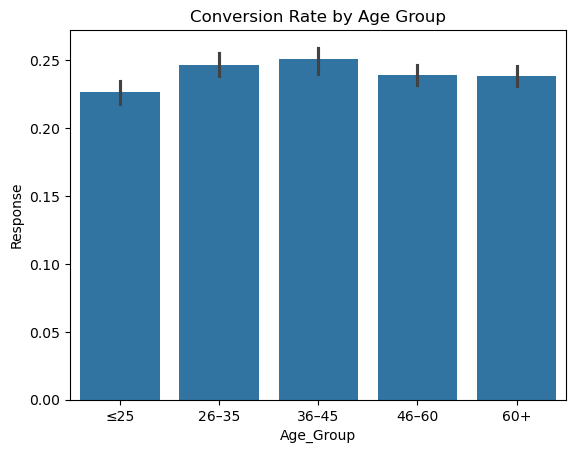

In [39]:
# Bar plot conversion by age group
sns.barplot(x='Age_Group', y='Response', data=df)
plt.title("Conversion Rate by Age Group")


In [40]:
# Conversion by premium amount
df.groupby('Reco_Policy_Premium')['Response'].mean().sort_values(ascending=False)

Reco_Policy_Premium
32947.2    1.0
21467.6    1.0
32452.0    1.0
17006.0    1.0
26486.0    1.0
          ... 
17586.8    0.0
17587.2    0.0
17589.6    0.0
17604.0    0.0
43350.4    0.0
Name: Response, Length: 6977, dtype: float64

In [41]:
# Conversion rate by insurance type
df.groupby('Reco_Insurance_Type')['Response'].mean().sort_values(ascending=False)

Reco_Insurance_Type
Joint         0.248309
Individual    0.237813
Name: Response, dtype: float64

In [42]:
# Conversion by policy category
df.groupby('Reco_Policy_Cat')['Response'].mean().sort_values(ascending=False)

Reco_Policy_Cat
15    0.465635
22    0.328385
12    0.315037
17    0.298456
5     0.290963
19    0.276969
8     0.269330
20    0.254958
14    0.243972
16    0.223555
18    0.220601
13    0.218527
21    0.193754
3     0.193579
7     0.185851
10    0.176623
6     0.172738
11    0.166453
9     0.166033
2     0.132499
4     0.073892
1     0.004067
Name: Response, dtype: float64

In [43]:
# Conversion by policy duration
df.groupby('Holding_Policy_Duration')['Response'].mean().sort_values(ascending=False)

Holding_Policy_Duration
10.0    0.273063
13.0    0.270059
7.0     0.257143
8.0     0.256839
12.0    0.253411
11.0    0.250916
14.0    0.250365
4.0     0.240707
5.0     0.238889
9.0     0.237882
2.0     0.237324
6.0     0.234952
3.0     0.232013
1.0     0.221605
Name: Response, dtype: float64

In [44]:
# Identify numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [45]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Duration',
        'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
        'Response'],
       dtype='object'),
 Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
        'Health Indicator'],
       dtype='object'))

In [46]:
df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Age_Group
0,C3,3213,Rented,Individual,36,36,No,X1,14.0,3.0,22,11628.0,0,36–45
1,C5,1117,Owned,Joint,75,22,No,X2,5.0,0.0,22,30510.0,0,60+
2,C5,3732,Owned,Individual,32,32,No,Missing,1.0,1.0,19,7450.0,1,26–35
3,C24,4378,Owned,Joint,52,48,No,X1,14.0,3.0,19,17780.0,0,46–60
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,36–45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,Rented,Individual,22,22,No,X3,5.0,0.0,18,7704.0,0,≤25
50878,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0,26–35
50879,C1,442,Rented,Individual,63,63,No,X2,14.0,1.0,12,11374.0,0,60+
50880,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1,60+


array([[<Axes: title={'center': 'Region_Code'}>,
        <Axes: title={'center': 'Upper_Age'}>,
        <Axes: title={'center': 'Lower_Age'}>],
       [<Axes: title={'center': 'Holding_Policy_Duration'}>,
        <Axes: title={'center': 'Holding_Policy_Type'}>,
        <Axes: title={'center': 'Reco_Policy_Cat'}>],
       [<Axes: title={'center': 'Reco_Policy_Premium'}>,
        <Axes: title={'center': 'Response'}>, <Axes: >]], dtype=object)

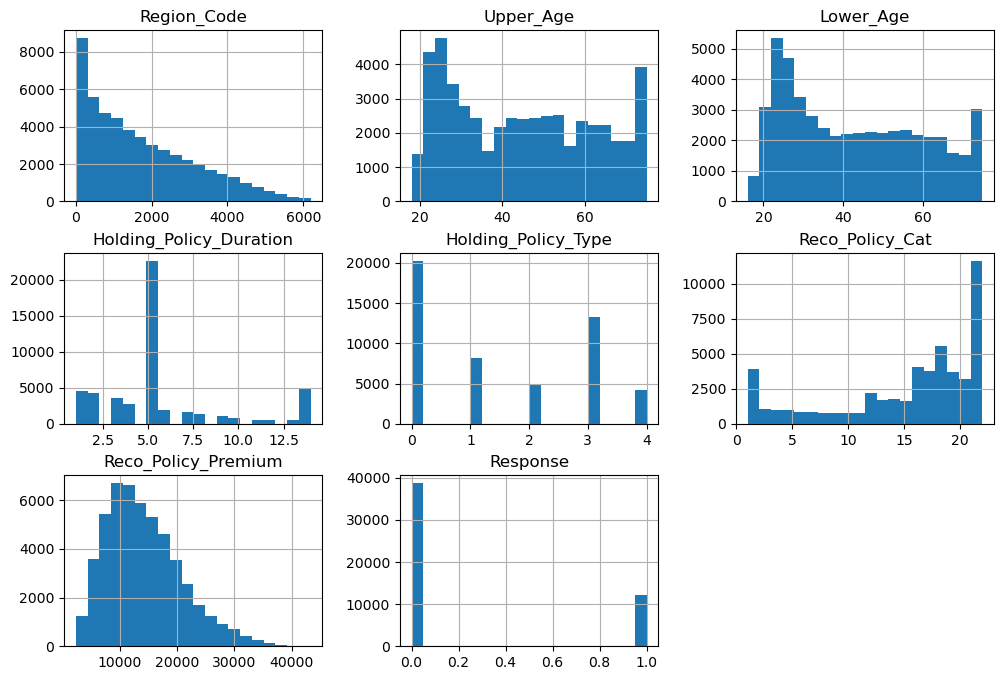

In [47]:
# Show distribution of numeric columns
df[num_cols].hist(bins=20, figsize=(12,8))

In [48]:
# Summary statistics
df[num_cols].describe()# 

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,5.611179,1.468417,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,3.527924,1.434988,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,0.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,4.000000,0.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,5.000000,1.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,6.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,14.000000,4.000000,22.000000,43350.400000,1.000000


In [49]:
# Conversion rate by each categorical variable
for col in cat_cols:
    print("\n", col)
    print(df.groupby(col)['Response'].mean().sort_values(ascending=False))


 City_Code
City_Code
C30    0.310345
C32    0.287500
C35    0.285714
C34    0.276923
C23    0.265758
C27    0.257627
C13    0.253731
C7     0.253403
C33    0.248252
C1     0.246072
C2     0.244353
C11    0.243243
C4     0.242168
C8     0.241971
C25    0.240437
C18    0.238394
C3     0.237472
C16    0.237004
C14    0.235925
C6     0.235897
C29    0.235142
C28    0.235088
C24    0.235081
C9     0.233410
C19    0.231368
C22    0.230620
C5     0.230205
C20    0.228942
C17    0.228645
C21    0.228277
C12    0.228111
C10    0.225947
C26    0.216433
C15    0.213322
C36    0.138889
C31    0.133333
Name: Response, dtype: float64

 Accomodation_Type
Accomodation_Type
Owned     0.241959
Rented    0.237495
Name: Response, dtype: float64

 Reco_Insurance_Type
Reco_Insurance_Type
Joint         0.248309
Individual    0.237813
Name: Response, dtype: float64

 Is_Spouse
Is_Spouse
Yes    0.243648
No     0.239213
Name: Response, dtype: float64

 Health Indicator
Health Indicator
X7         0.316327
X1  

Text(0.5, 1.0, 'Conversion by Insurance Type')

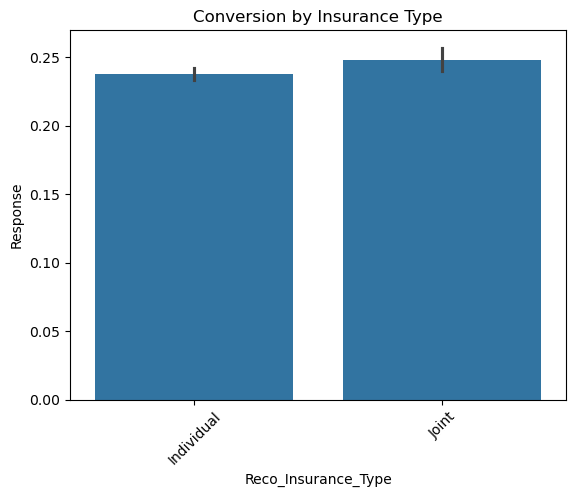

In [50]:
# Visualize conversion by gategory
sns.barplot(x='Reco_Insurance_Type', y='Response', data=df)
plt.xticks(rotation=45)
plt.title("Conversion by Insurance Type")

In [51]:
# Create premium bands
df['Premium_Band'] = pd.qcut(df['Reco_Policy_Premium'], q=4, labels=['Low','Medium','High','Very High'])

In [52]:
# Conversion by premium band
df.groupby('Premium_Band')['Response'].mean().sort_values(ascending=False)

C:\Users\Rugare Madzara\AppData\Local\Temp\ipykernel_5736\687649934.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Premium_Band')['Response'].mean().sort_values(ascending=False)


Premium_Band
Very High    0.243218
High         0.242980
Low          0.236846
Medium       0.236751
Name: Response, dtype: float64

Text(0.5, 1.0, 'Conversion by Premium Band')

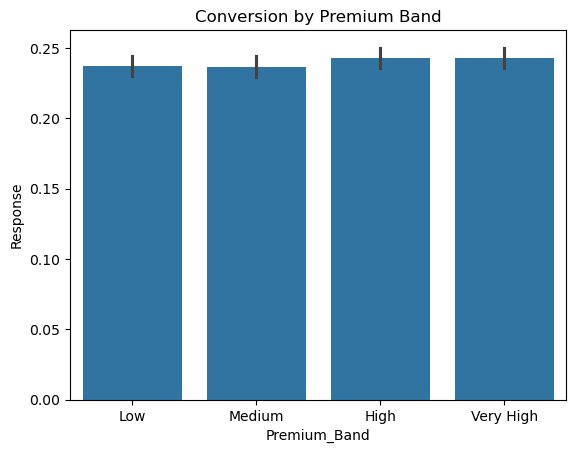

In [53]:
# Visualize premium band
sns.barplot(x='Premium_Band', y='Response', data=df)
plt.title("Conversion by Premium Band")

Text(0.5, 1.0, 'Correlation Heatmap (Numeric Variables)')

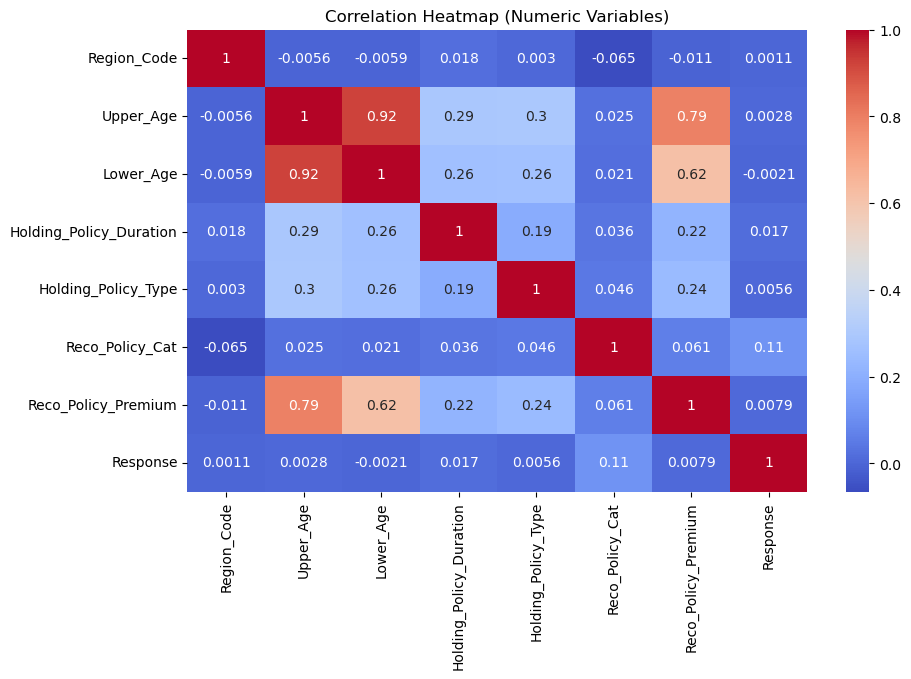

In [54]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Variables)")

In [55]:
# Difference between upper and lower age
df['Age_Diff'] = df['Upper_Age'] - df['Lower_Age']

In [56]:
# Create combined feature
df['Type_Cat'] = df['Reco_Insurance_Type'].astype(str) + "_" + df['Reco_Policy_Cat'].astype(str)

In [57]:
df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Age_Group,Premium_Band,Age_Diff,Type_Cat
0,C3,3213,Rented,Individual,36,36,No,X1,14.0,3.0,22,11628.0,0,36–45,Medium,0,Individual_22
1,C5,1117,Owned,Joint,75,22,No,X2,5.0,0.0,22,30510.0,0,60+,Very High,53,Joint_22
2,C5,3732,Owned,Individual,32,32,No,Missing,1.0,1.0,19,7450.0,1,26–35,Low,0,Individual_19
3,C24,4378,Owned,Joint,52,48,No,X1,14.0,3.0,19,17780.0,0,46–60,High,4,Joint_19
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,36–45,Medium,0,Individual_16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,Rented,Individual,22,22,No,X3,5.0,0.0,18,7704.0,0,≤25,Low,0,Individual_18
50878,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0,26–35,Low,0,Individual_4
50879,C1,442,Rented,Individual,63,63,No,X2,14.0,1.0,12,11374.0,0,60+,Medium,0,Individual_12
50880,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1,60+,Very High,22,Joint_16


In [58]:
df['Type_Cat'].value_counts().head()

Type_Cat
Individual_22    5147
Individual_18    4467
Individual_21    3945
Individual_16    3253
Individual_19    2921
Name: count, dtype: int64

In [59]:
# 10 strongest converting segments
df.groupby('Type_Cat')['Response'].mean().sort_values(ascending=False).head(10)

Type_Cat
Individual_15    0.467502
Joint_15         0.458580
Joint_17         0.350898
Joint_22         0.332646
Individual_22    0.327181
Individual_12    0.317302
Joint_12         0.303621
Individual_5     0.292746
Joint_5          0.285106
Individual_17    0.283465
Name: Response, dtype: float64

In [60]:
# Create premium bands (quartiles)
df['Premium_Band'] = pd.qcut(df['Reco_Policy_Premium'], q=4, labels=['Low','Medium','High','Very High'])

In [61]:
# Conversion by premium band
df.groupby('Premium_Band')['Response'].mean().sort_values(ascending=False)

C:\Users\Rugare Madzara\AppData\Local\Temp\ipykernel_5736\687649934.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Premium_Band')['Response'].mean().sort_values(ascending=False)


Premium_Band
Very High    0.243218
High         0.242980
Low          0.236846
Medium       0.236751
Name: Response, dtype: float64

In [62]:
# Create duration bands
df['Duration_Band'] = pd.cut(df['Holding_Policy_Duration'], bins=[0,1,3,6,10,20], labels=['Very Short','Short','Medium','Long','Very Long'])

In [63]:
# Conversion by duration band
df.groupby('Duration_Band')['Response'].mean().sort_values(ascending=False)

C:\Users\Rugare Madzara\AppData\Local\Temp\ipykernel_5736\4073952330.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Duration_Band')['Response'].mean().sort_values(ascending=False)


Duration_Band
Long          0.255319
Very Long     0.252237
Medium        0.238800
Short         0.234897
Very Short    0.221605
Name: Response, dtype: float64

In [64]:
# Compute age difference
df['Age_Diff'] = df['Upper_Age'] - df['Lower_Age']

In [65]:
# Analyze age difference impact
df.groupby('Age_Diff')['Response'].mean().sort_values(ascending=False).head()

Age_Diff
59    1.000000
54    0.500000
47    0.470588
56    0.400000
58    0.333333
Name: Response, dtype: float64

In [66]:
# Combine spouse status with age group
df['Spouse_AgeGroup'] = df['Is_Spouse'].astype(str) + "_" + df['Age_Group'].astype(str)

In [67]:
df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Age_Group,Premium_Band,Age_Diff,Type_Cat,Duration_Band,Spouse_AgeGroup
0,C3,3213,Rented,Individual,36,36,No,X1,14.0,3.0,22,11628.0,0,36–45,Medium,0,Individual_22,Very Long,No_36–45
1,C5,1117,Owned,Joint,75,22,No,X2,5.0,0.0,22,30510.0,0,60+,Very High,53,Joint_22,Medium,No_60+
2,C5,3732,Owned,Individual,32,32,No,Missing,1.0,1.0,19,7450.0,1,26–35,Low,0,Individual_19,Very Short,No_26–35
3,C24,4378,Owned,Joint,52,48,No,X1,14.0,3.0,19,17780.0,0,46–60,High,4,Joint_19,Very Long,No_46–60
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,36–45,Medium,0,Individual_16,Short,No_36–45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,Rented,Individual,22,22,No,X3,5.0,0.0,18,7704.0,0,≤25,Low,0,Individual_18,Medium,No_≤25
50878,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0,26–35,Low,0,Individual_4,Long,No_26–35
50879,C1,442,Rented,Individual,63,63,No,X2,14.0,1.0,12,11374.0,0,60+,Medium,0,Individual_12,Very Long,No_60+
50880,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1,60+,Very High,22,Joint_16,Short,No_60+


In [68]:
df.groupby('Spouse_AgeGroup')['Response'].mean().sort_values(ascending=False).head(10)

Spouse_AgeGroup
Yes_26–35    0.258883
Yes_46–60    0.251265
No_36–45     0.251092
Yes_36–45    0.248826
No_26–35     0.244651
Yes_≤25      0.243446
No_60+       0.241623
No_46–60     0.236375
Yes_60+      0.229582
No_≤25       0.226082
Name: Response, dtype: float64

In [69]:
pd.pivot_table(df, values='Response', index='Age_Group', columns='Premium_Band', aggfunc='mean')

C:\Users\Rugare Madzara\AppData\Local\Temp\ipykernel_5736\436552496.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values='Response', index='Age_Group', columns='Premium_Band', aggfunc='mean')


Premium_Band,Low,Medium,High,Very High
Age_Group,,,,
≤25,0.226784,0.224161,0.275229,0.000000
26–35,0.249432,0.243139,0.236617,0.286517
36–45,0.245366,0.243028,0.257689,0.266667
46–60,0.183333,0.233999,0.237034,0.248409
60+,NaN,0.168750,0.243320,0.237753


In [70]:
pd.pivot_table(df, values='Response', index='Reco_Insurance_Type', columns='Duration_Band', aggfunc='mean')

C:\Users\Rugare Madzara\AppData\Local\Temp\ipykernel_5736\2662825658.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values='Response', index='Reco_Insurance_Type', columns='Duration_Band', aggfunc='mean')


Duration_Band,Very Short,Short,Medium,Long,Very Long
Reco_Insurance_Type,,,,,
Individual,0.222683,0.233515,0.236532,0.249587,0.252629
Joint,0.217195,0.240300,0.249427,0.271860,0.251245


In [71]:
# Top converting regions
df.groupby('Region_Code')['Response'].mean().sort_values(ascending=False).head(10)

Region_Code
6194    1.0
4562    1.0
5600    1.0
4595    1.0
5584    1.0
5581    1.0
4592    1.0
5577    1.0
5571    1.0
5559    1.0
Name: Response, dtype: float64

In [72]:
# Top converting cities
df.groupby('City_Code')['Response'].mean().sort_values(ascending=False).head(10)

City_Code
C30    0.310345
C32    0.287500
C35    0.285714
C34    0.276923
C23    0.265758
C27    0.257627
C13    0.253731
C7     0.253403
C33    0.248252
C1     0.246072
Name: Response, dtype: float64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   City_Code                50882 non-null  object  
 1   Region_Code              50882 non-null  int64   
 2   Accomodation_Type        50882 non-null  object  
 3   Reco_Insurance_Type      50882 non-null  object  
 4   Upper_Age                50882 non-null  int64   
 5   Lower_Age                50882 non-null  int64   
 6   Is_Spouse                50882 non-null  object  
 7   Health Indicator         50882 non-null  object  
 8   Holding_Policy_Duration  50882 non-null  float64 
 9   Holding_Policy_Type      50882 non-null  float64 
 10  Reco_Policy_Cat          50882 non-null  int64   
 11  Reco_Policy_Premium      50882 non-null  float64 
 12  Response                 50882 non-null  int64   
 13  Age_Group                50882 non-null  category
 14  Premiu

In [74]:
# Top region-city combinations
df.groupby('Region_Code')['Response'].mean().sort_values(ascending=False).head(10)

Region_Code
6194    1.0
4562    1.0
5600    1.0
4595    1.0
5584    1.0
5581    1.0
4592    1.0
5577    1.0
5571    1.0
5559    1.0
Name: Response, dtype: float64

Text(0.5, 1.0, 'Age vs Premium by Response')

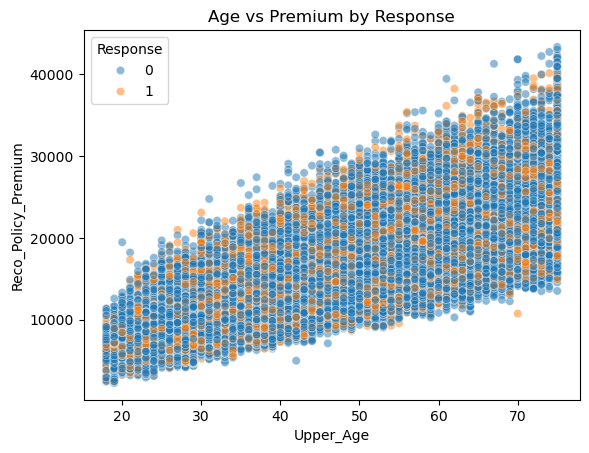

In [75]:
# Scatter plot of age vs premium colored by response
sns.scatterplot(data=df, x='Upper_Age', y='Reco_Policy_Premium', hue='Response', alpha=0.5)
plt.title("Age vs Premium by Response")

In [76]:
# Mean encode categorical columns
cat_mean_encoded = df[cat_cols].apply(lambda x: x.astype('category').cat.codes)

# Correlation with target
corr = pd.concat([cat_mean_encoded, df['Response']], axis=1).corr()['Response'].sort_values(ascending=False)

corr

Response               1.000000
Reco_Insurance_Type    0.009891
Is_Spouse              0.003859
Health Indicator       0.003824
City_Code             -0.000495
Accomodation_Type     -0.005201
Name: Response, dtype: float64

Text(0.5, 1.0, 'Premium Distribution: Responders vs Non-Responders')

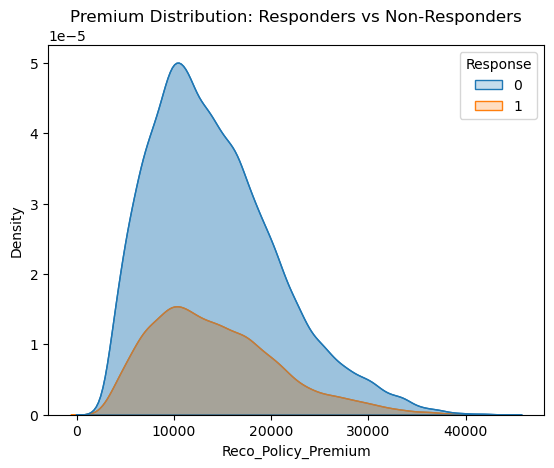

In [77]:
# Premium distribution by response
sns.kdeplot(data=df, x='Reco_Policy_Premium', hue='Response', fill=True)
plt.title("Premium Distribution: Responders vs Non-Responders")# Premium distribution by response
sns.kdeplot(data=df, x='Reco_Policy_Premium', hue='Response', fill=True)
plt.title("Premium Distribution: Responders vs Non-Responders")

Text(0.5, 1.0, 'Age Distribution by Response')

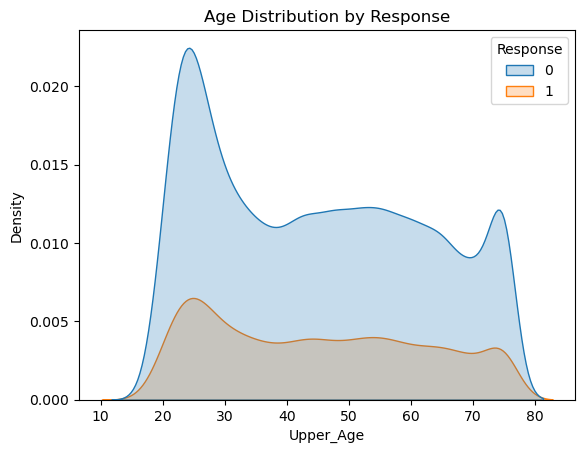

In [78]:
# Age distribution by response
sns.kdeplot(data=df, x='Upper_Age', hue='Response', fill=True)
plt.title("Age Distribution by Response")

C:\Users\Rugare Madzara\AppData\Local\Temp\ipykernel_5736\1876963311.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot2 = pd.pivot_table(df, values='Response', index='Reco_Insurance_Type', columns='Duration_Band', aggfunc='mean')


Text(0.5, 1.0, 'Insurance Type vs Duration Band (Conversion)')

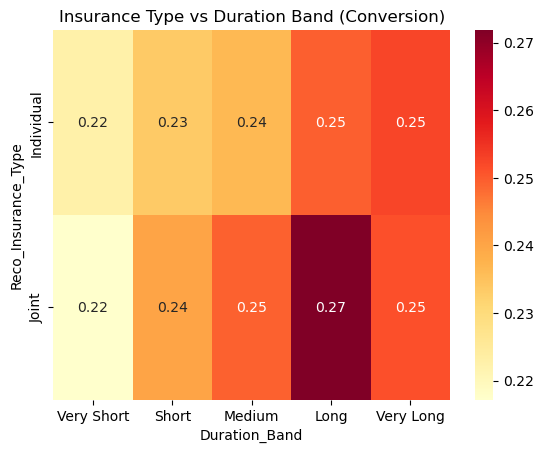

In [79]:
# Insurance Type vs Duration Band (Conversion)
pivot2 = pd.pivot_table(df, values='Response', index='Reco_Insurance_Type', columns='Duration_Band', aggfunc='mean')
sns.heatmap(pivot2, annot=True, cmap='YlOrRd')
plt.title("Insurance Type vs Duration Band (Conversion)")

In [80]:
# Correlation of numeric features with response
df[num_cols].corr()['Response'].sort_values(ascending=False)

Response                   1.000000
Reco_Policy_Cat            0.114321
Holding_Policy_Duration    0.017156
Reco_Policy_Premium        0.007943
Holding_Policy_Type        0.005583
Upper_Age                  0.002772
Region_Code                0.001121
Lower_Age                 -0.002099
Name: Response, dtype: float64

In [81]:
# Create premium buckets
df['Premium_Bucket'] = (df['Reco_Policy_Premium'] // 500) * 500

df.groupby('Premium_Bucket')['Response'].mean().sort_values(ascending=False).head(10)

Premium_Bucket
38500.0    0.666667
40000.0    0.500000
36000.0    0.450000
35500.0    0.320000
38000.0    0.312500
34500.0    0.305556
36500.0    0.300000
27000.0    0.290984
17500.0    0.273997
39500.0    0.272727
Name: Response, dtype: float64

Text(0.5, 1.0, 'Distribution of Policy Premium')

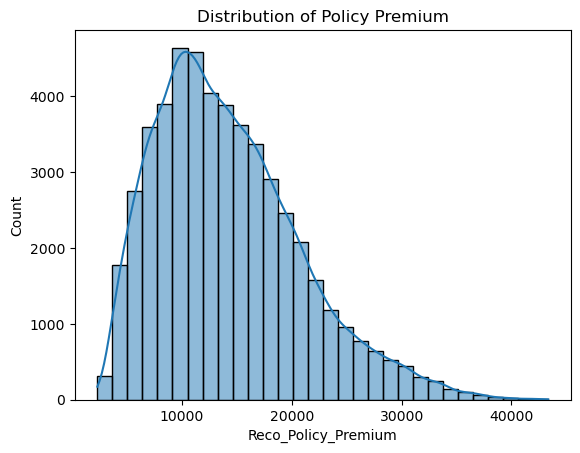

In [82]:
# Premium distribution
sns.histplot(df['Reco_Policy_Premium'], bins=30, kde=True)
plt.title("Distribution of Policy Premium")

Text(0.5, 1.0, 'Response Distribution')

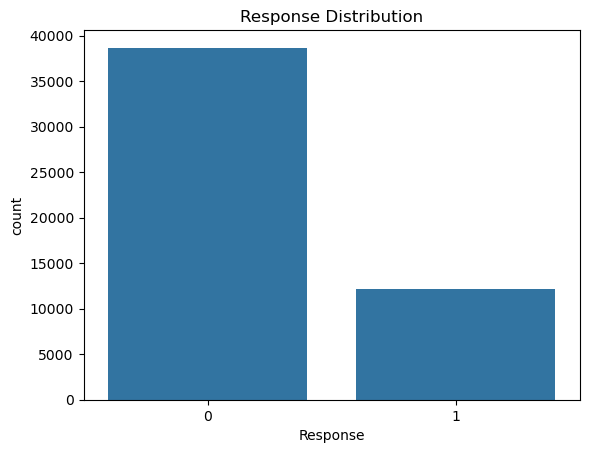

In [83]:
# Plot response distribution
sns.countplot(x='Response', data=df)
plt.title("Response Distribution")

Text(0.5, 1.0, 'Distribution of Customer Age')

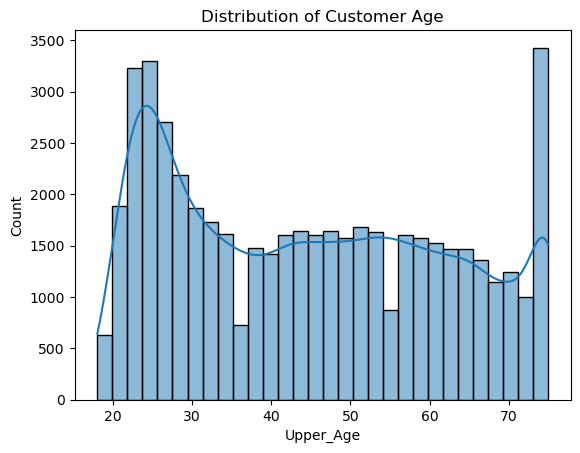

In [84]:
# Age distribution
sns.histplot(df['Upper_Age'], bins=30, kde=True)
plt.title("Distribution of Customer Age")

Text(0.5, 1.0, 'Conversion Rate by Age Group')

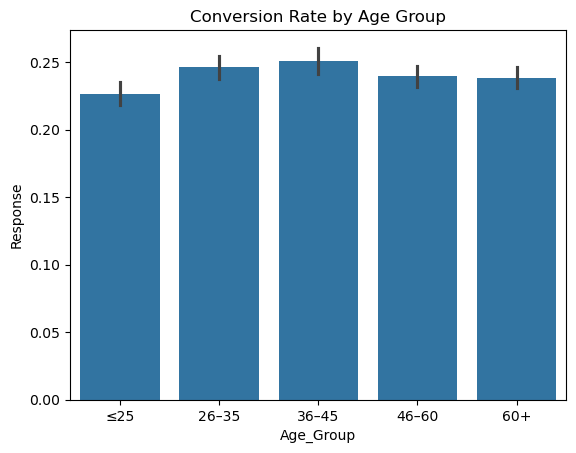

In [85]:
# Conversion by age group
sns.barplot(x='Age_Group', y='Response', data=df)
plt.title("Conversion Rate by Age Group")

Text(0.5, 1.0, 'Conversion Rate by Policy Duration')

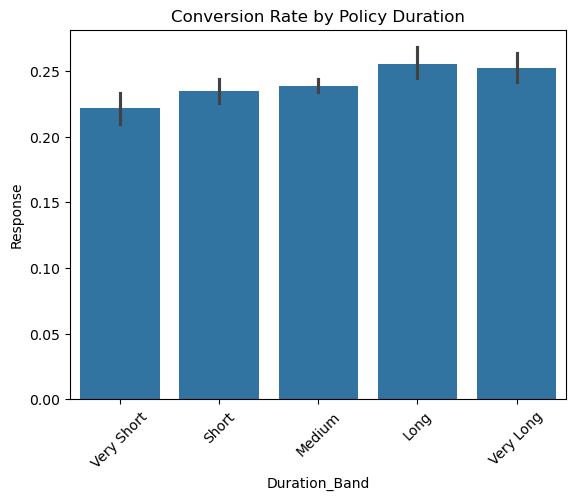

In [86]:
# Conversion by duration band
sns.barplot(x='Duration_Band', y='Response', data=df)
plt.xticks(rotation=45)
plt.title("Conversion Rate by Policy Duration")

Text(0.5, 1.0, 'Premium Distribution: Response vs Non-Response')

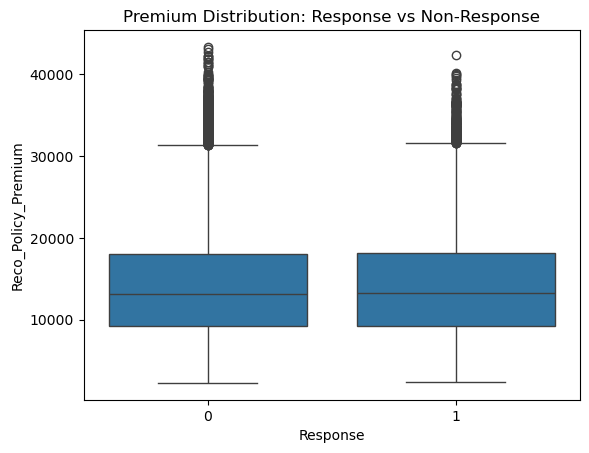

In [87]:
# Premium distribution by response
sns.boxplot(x='Response', y='Reco_Policy_Premium', data=df)
plt.title("Premium Distribution: Response vs Non-Response")

Text(0.5, 1.0, 'Correlation Heatmap')

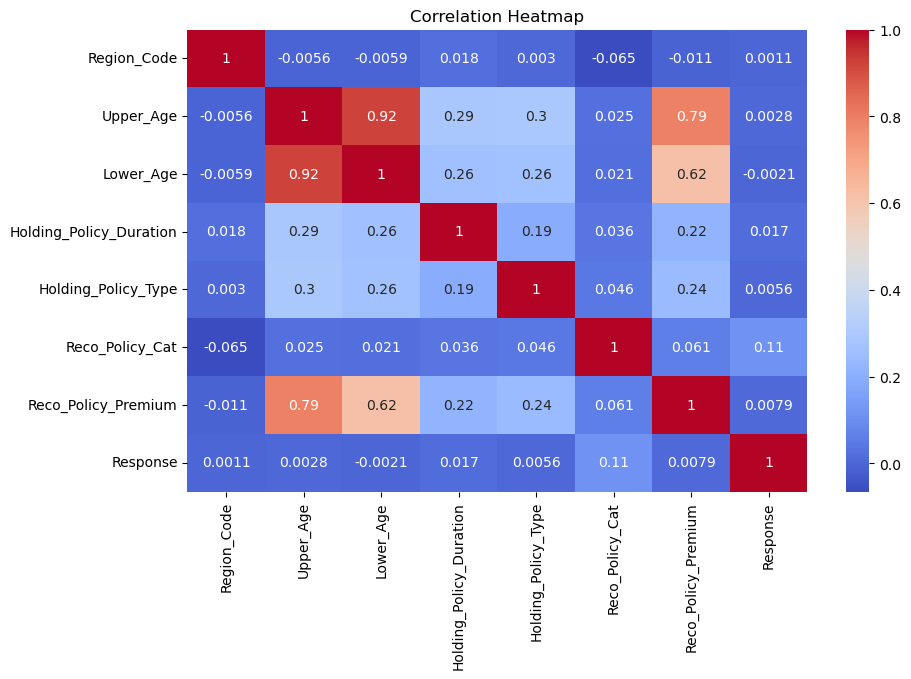

In [88]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

C:\Users\Rugare Madzara\AppData\Local\Temp\ipykernel_5736\2818209549.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot1 = pd.pivot_table(df, values='Response', index='Age_Group', columns='Premium_Band', aggfunc='mean')


Text(0.5, 1.0, 'Conversion Heatmap: Age Group vs Premium Band')

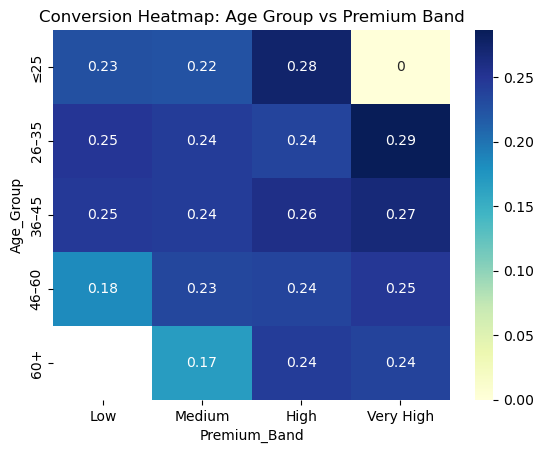

In [89]:
# Interaction heatmap
pivot1 = pd.pivot_table(df, values='Response', index='Age_Group', columns='Premium_Band', aggfunc='mean')
sns.heatmap(pivot1, annot=True, cmap='YlGnBu')
plt.title("Conversion Heatmap: Age Group vs Premium Band")

Text(0.5, 1.0, 'Policy Duration Distribution by Response')

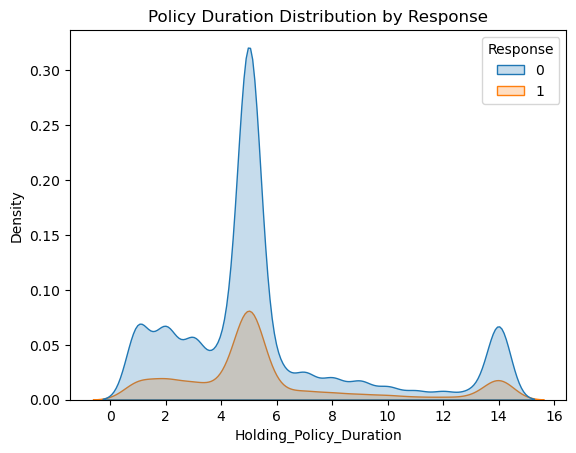

In [90]:
# Duration distribution by response
sns.kdeplot(data=df, x='Holding_Policy_Duration', hue='Response', fill=True)
plt.title("Policy Duration Distribution by Response")

Text(0.5, 1.0, 'Top 15 Converting Type_Cat Segments')

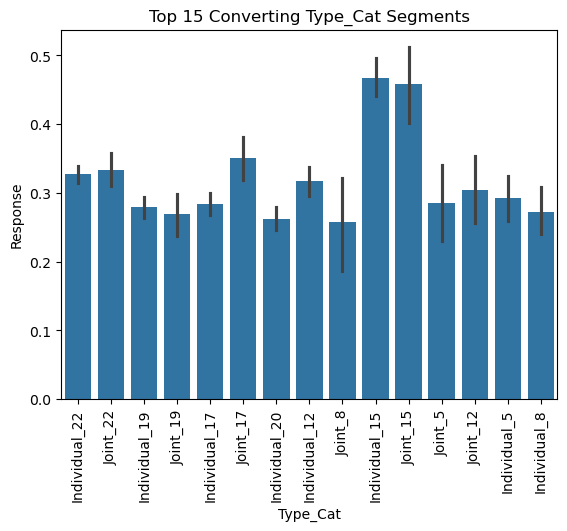

In [91]:
# Top categories for Type_Cat
top_typecat = df.groupby('Type_Cat')['Response'].mean().sort_values(ascending=False).head(15).index

sns.barplot(x='Type_Cat', y='Response', data=df[df['Type_Cat'].isin(top_typecat)])
plt.xticks(rotation=90)
plt.title("Top 15 Converting Type_Cat Segments")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   City_Code                50882 non-null  object  
 1   Region_Code              50882 non-null  int64   
 2   Accomodation_Type        50882 non-null  object  
 3   Reco_Insurance_Type      50882 non-null  object  
 4   Upper_Age                50882 non-null  int64   
 5   Lower_Age                50882 non-null  int64   
 6   Is_Spouse                50882 non-null  object  
 7   Health Indicator         50882 non-null  object  
 8   Holding_Policy_Duration  50882 non-null  float64 
 9   Holding_Policy_Type      50882 non-null  float64 
 10  Reco_Policy_Cat          50882 non-null  int64   
 11  Reco_Policy_Premium      50882 non-null  float64 
 12  Response                 50882 non-null  int64   
 13  Age_Group                50882 non-null  category
 14  Premiu

In [93]:
# Check unique values found inHealth Indicator
df['Health Indicator'].value_counts()

Health Indicator
X1         13010
Missing    11691
X2         10332
X3          6762
X4          5743
X5          1727
X6          1280
X7           196
X8            78
X9            63
Name: count, dtype: int64

In [94]:
# Check unique values found in Reco_Insurance_Type
df['Reco_Insurance_Type'].value_counts()

Reco_Insurance_Type
Individual    40536
Joint         10346
Name: count, dtype: int64

In [95]:
# Check unique values found in Accomodation_Type
df['Accomodation_Type'].value_counts()

Accomodation_Type
Owned     27951
Rented    22931
Name: count, dtype: int64

In [96]:
# Check unique values found in Region_Code
df['Region_Code'].value_counts()

Region_Code
1       96
5       75
4       73
6       73
2       73
        ..
6041     1
5316     1
5606     1
5282     1
5450     1
Name: count, Length: 5316, dtype: int64

In [97]:
# Check unique values found in SIZE_CATEGORY
df['City_Code'].value_counts()

City_Code
C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: count, dtype: int64

In [98]:
# check correlations using scipy 
# from scipy import stats 
from scipy import stats

In [99]:
# Compute correlation matrix for numeric variables
corr_matrix = df[num_cols].corr()
corr_matrix

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Region_Code,1.000000,-0.005649,-0.005928,0.018446,0.003002,-0.065120,-0.010797,0.001121
Upper_Age,-0.005649,1.000000,0.921392,0.290506,0.295469,0.025257,0.792689,0.002772
Lower_Age,-0.005928,0.921392,1.000000,0.261744,0.264718,0.021163,0.615739,-0.002099
Holding_Policy_Duration,0.018446,0.290506,0.261744,1.000000,0.190236,0.035566,0.217233,0.017156
Holding_Policy_Type,0.003002,0.295469,0.264718,0.190236,1.000000,0.045630,0.240328,0.005583
Reco_Policy_Cat,-0.065120,0.025257,0.021163,0.035566,0.045630,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.010797,0.792689,0.615739,0.217233,0.240328,0.060989,1.000000,0.007943
Response,0.001121,0.002772,-0.002099,0.017156,0.005583,0.114321,0.007943,1.000000


Text(0.5, 1.0, 'Correlation Heatmap of Numeric Variables')

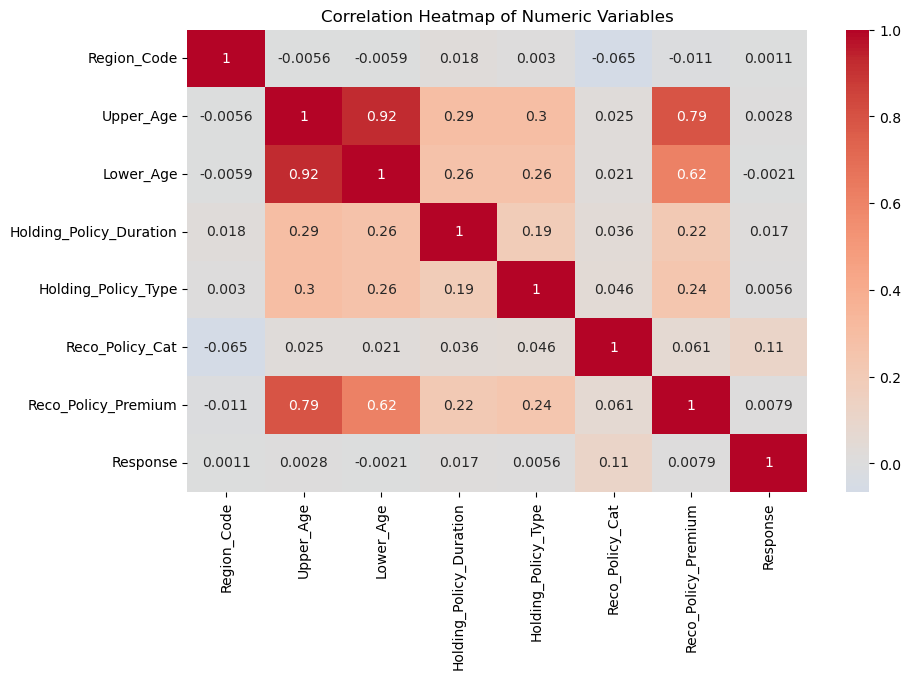

In [100]:
# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Variables")

In [101]:
# Correlation of numeric variables with Response
df[num_cols].corr()['Response'].sort_values(ascending=False)

Response                   1.000000
Reco_Policy_Cat            0.114321
Holding_Policy_Duration    0.017156
Reco_Policy_Premium        0.007943
Holding_Policy_Type        0.005583
Upper_Age                  0.002772
Region_Code                0.001121
Lower_Age                 -0.002099
Name: Response, dtype: float64

In [102]:
from scipy.stats import pearsonr

pearsonr(df['Reco_Policy_Premium'], df['Response'])

PearsonRResult(statistic=0.007943390711708603, pvalue=0.07316853877055214)

##### RANDOM FOREST MODEL

In [104]:
# Define target
y = df['Response']

In [105]:
# Define features
X = df.drop(columns=['Response'])

In [106]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [107]:
# Recompute column lists from X_train
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
cat_cols = X_train.select_dtypes(include=['object','category']).columns

In [108]:
# Import preprocessing tools
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [109]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_cols),('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

In [110]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [111]:
# Create Random Forest pipeline
rf_model = Pipeline(steps=[('preprocess', preprocessor),('model', RandomForestClassifier(n_estimators=300,random_state=42,class_weight='balanced'))])

In [112]:
# Train Random Forest
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Age_Diff', 'Premium_Bucket'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Age_Group', 'Premium_Band', 'Type_Cat',
       'Duration_Band', 'Spouse_AgeGroup'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, random_state=42))])

In [113]:
# Predict class labels
y_pred = rf_model.predict(X_test)

# Predict probabilities
y_proba = rf_model.predict_proba(X_test)[:, 1]

In [114]:
# Print evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

AUC: 0.6499415528827295
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      7735
           1       0.46      0.05      0.09      2442

    accuracy                           0.76     10177
   macro avg       0.61      0.52      0.48     10177
weighted avg       0.69      0.76      0.68     10177



In [115]:
# make sure predictions exist
print("Predictions shape:", y_pred.shape)
print("Unique predictions:", np.unique(y_pred))

Predictions shape: (10177,)
Unique predictions: [0 1]


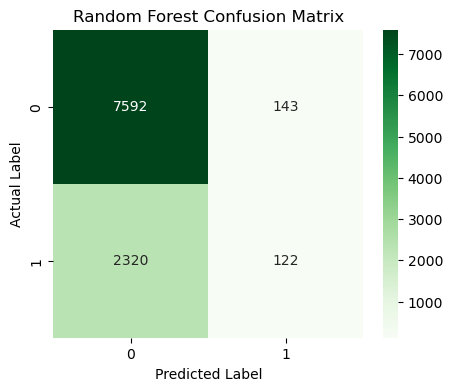

In [116]:
# Plot confusion matrix
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [117]:
# Import function to compute ROC curve
from sklearn.metrics import roc_curve

In [118]:
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

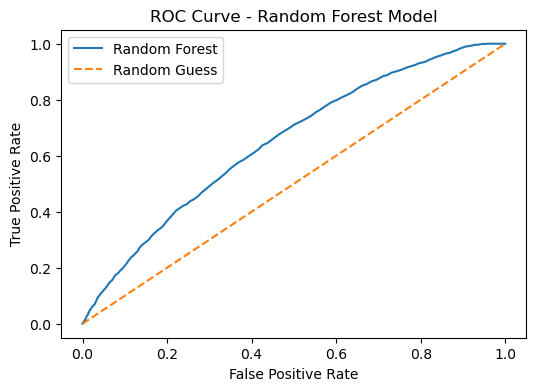

In [119]:
# Create ROC curve plot
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1], [0,1], linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Model")
plt.legend()
plt.show()

In [120]:
# Calculate Area Under the ROC Curve (AUC)
auc_score = roc_auc_score(y_test, y_proba)

In [121]:
# Print AUC score
auc_score

0.6499415528827295

In [122]:
# Set a lower probability threshold to capture more converting leads
threshold = 0.2

In [123]:
# Convert probabilities into class predictions using custom threshold
y_pred_02 = (y_proba >= threshold).astype(int)

Text(0.5, 1.0, 'Confusion Matrix (Threshold = 0.2)')

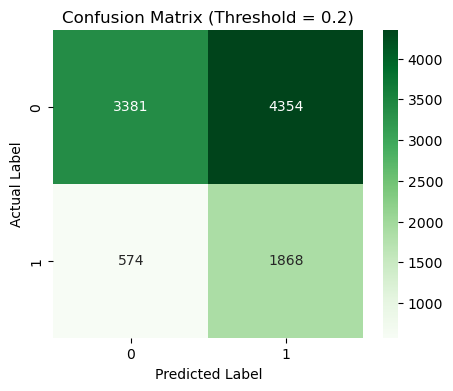

In [124]:
# Plot confusion matrix using the new threshold
plt.figure(figsize=(5,4))
cm_02 = confusion_matrix(y_test, y_pred_02)
sns.heatmap(cm_02, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (Threshold = 0.2)")

#### Extract feature names after preprocessing

In [126]:
# Extract the trained Random Forest model from the pipeline
rf = rf_model.named_steps['model']

In [127]:
# Extract the preprocessing step from the pipeline
preprocess = rf_model.named_steps['preprocess']

In [128]:
# Get names of numeric features (they pass through unchanged except scaling)
num_features = list(num_cols)

##### ONE HOT ENCODING

In [130]:
# Get the OneHotEncoder used for categorical variables
ohe = preprocess.named_transformers_['cat']

In [131]:
# Get expanded categorical feature names after one-hot encoding
cat_features = ohe.get_feature_names_out(cat_cols)

In [132]:
# Combine numeric and categorical feature names into a single list
feature_names = num_features + list(cat_features)

#### Creating feature importance dataframe

In [134]:
# Extract feature importance values from the Random Forest model
importances = rf.feature_importances_

In [135]:
# Create a dataframe mapping features to their importance scores
feat_importance = pd.DataFrame({'Feature': feature_names,'Importance': importances})

In [136]:
# Sort features by importance in descending order
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

In [137]:
# Display the top 15 most important features
feat_importance.head(15)

,Feature,Importance
0,Region_Code,0.107419
6,Reco_Policy_Premium,0.101697
8,Premium_Bucket,0.074095
2,Lower_Age,0.068873
1,Upper_Age,0.067433
5,Reco_Policy_Cat,0.043318
3,Holding_Policy_Duration,0.038020
4,Holding_Policy_Type,0.034990
52,Health Indicator_X1,0.016858
51,Health Indicator_Missing,0.016303


Text(0, 0.5, 'Feature')

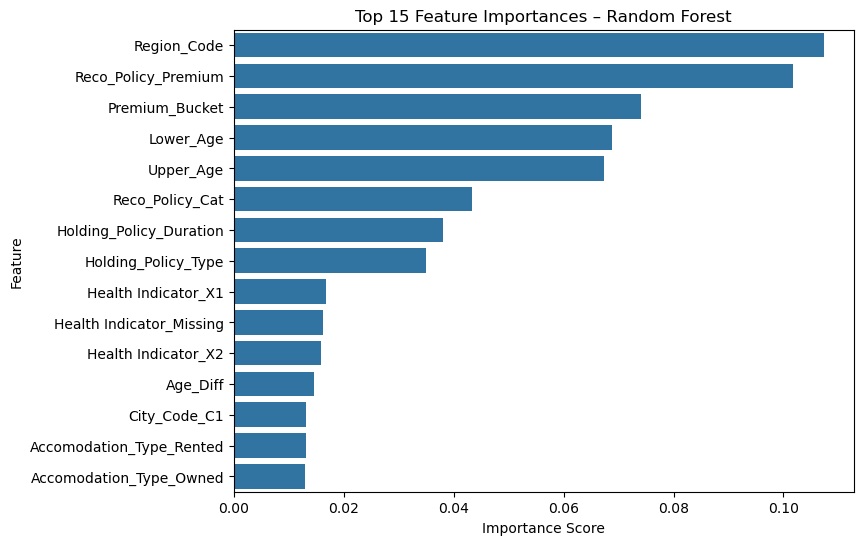

In [138]:
# Plot the top 15 most important features
plt.figure(figsize=(8,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feat_importance.head(15))
plt.title("Top 15 Feature Importances – Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

### DECISION TREE CLASSIFIER WITH HYPER-PARAMETER TUNING

In [140]:
# Import Decision Tree and GridSearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [141]:
# Create Decision Tree pipeline using the same preprocessing
dt_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),   # Apply scaling + one-hot encoding
    ('model', DecisionTreeClassifier(random_state=42))])

In [142]:
# Define hyperparameters to tune for the Decision Tree
param_grid = {'model__max_depth': [3, 5, 10, None],'model__min_samples_split': [2, 10, 50],'model__min_samples_leaf': [1, 5, 20]}

In [143]:
# Set up grid search using AUC as the evaluation metric
grid_dt = GridSearchCV(
    dt_pipeline,
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)

In [144]:
# Fit Decision Tree with hyperparameter tuning
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Age_Diff', 'Premium_Bucket'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Cit..._Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Age_Group', 'Premium_Band', 'Type_Cat',
       'Duration_Band', 'Spouse_AgeGroup'],
      dtype='object'))])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 5, 10, None],
                         'model__min_samples_leaf': [1, 5, 20],
                         'model__min_samples_split': [2, 10, 50]},
             scoring='roc_auc')

In [145]:
# Get best model from grid search
best_dt = grid_dt.best_estimator_

In [146]:
# Display the best hyperparameters found during grid search
print("Best Decision Tree parameters:", grid_dt.best_params_)

Best Decision Tree parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 50}


In [147]:
# Predict class labels using the tuned Decision Tree pipeline
dt_pred = best_dt.predict(X_test)

In [148]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
# Predict conversion probabilities using the tuned Decision Tree pipeline
dt_proba = best_dt.predict_proba(X_test)[:, 1]

In [150]:
dt_proba

array([0.30503597, 0.03816794, 0.05882353, ..., 0.2440644 , 0.2440644 ,
       0.2440644 ])

Text(33.22222222222222, 0.5, 'Actual Label')

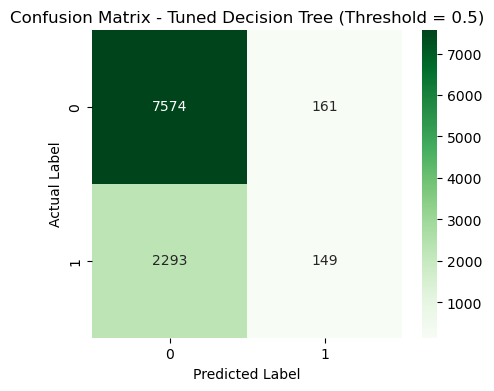

In [151]:
# Plot confusion matrix for the tuned Decision Tree
plt.figure(figsize=(5,4))
cm_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned Decision Tree (Threshold = 0.5)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

In [152]:
# Extract the trained Decision Tree model from the tuned pipeline
dt_model = best_dt.named_steps['model']

In [153]:
from sklearn.tree import plot_tree

Text(0.5, 1.0, 'Top Levels of Tuned Decision Tree (Depth ≤ 3)')

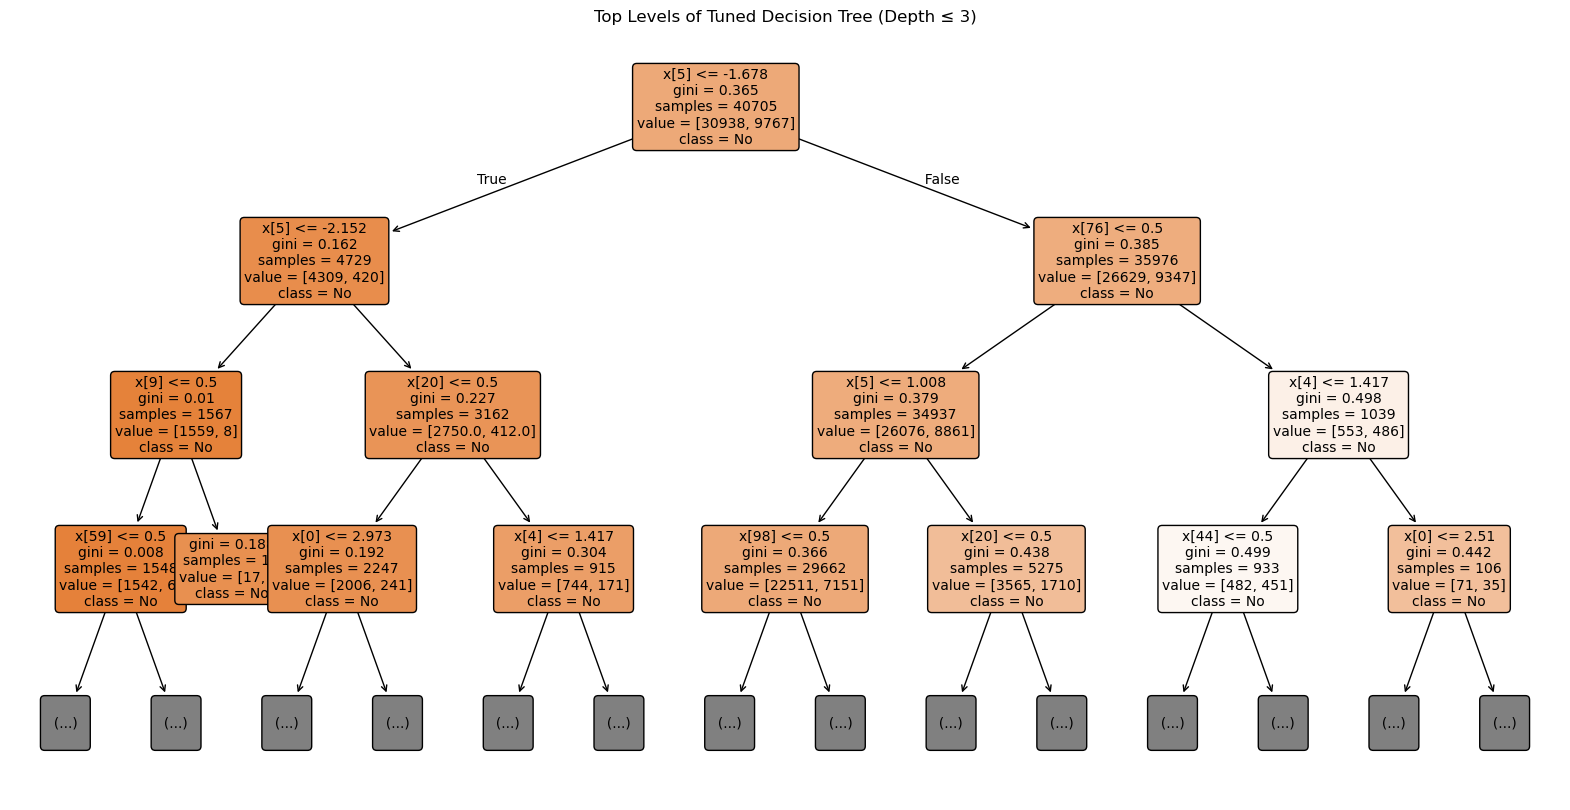

In [154]:
# Plot the top 3 levels of the tuned Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    max_depth=3,  # Limit depth to keep it readable
    filled=True,
    rounded=True,
    class_names=['No', 'Yes'],
    fontsize=10
)
plt.title("Top Levels of Tuned Decision Tree (Depth ≤ 3)")

In [155]:
# Import accuracy metric
from sklearn.metrics import accuracy_score

In [156]:
# Build a comparison table for tuned Decision Tree vs Random Forest
comparison = pd.DataFrame({
    "Model": ["Random Forest", "Tuned Decision Tree"],
    "AUC": [roc_auc_score(y_test, y_proba), roc_auc_score(y_test, dt_proba)],
    "Accuracy": [accuracy_score(y_test, y_pred), accuracy_score(y_test, dt_pred)]})


In [157]:
# Display comparison table
comparison

,Model,AUC,Accuracy
0,Random Forest,0.649942,0.757984
1,Tuned Decision Tree,0.625478,0.758868


In [158]:
# Import tools for evaluating models
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

In [159]:
# Store model results in a simple dictionary for comparison
models = { "Random Forest": rf_model, "Tuned Decision Tree": best_dt}

In [160]:
# Evaluate each model on the test set using AUC (best for lead scoring)
results = {}

for name, model in models.items():
    # Predict probabilities for the positive class (conversion)
    proba = model.predict_proba(X_test)[:, 1]

In [161]:
# Predict class labels using default threshold (0.5)
pred = model.predict(X_test)

In [162]:
# Compute AUC and Accuracy
auc = roc_auc_score(y_test, proba)
acc = accuracy_score(y_test, pred)

In [163]:
# Save results
results[name] = {"AUC": auc, "Accuracy": acc}

In [164]:
# Find the best model based on AUC
best_model_name = max(results, key=lambda k: results[k]["AUC"])
best_model = models[best_model_name]

In [165]:
# Print the best model name and its performance
print("Best model based on AUC:", best_model_name)
print("AUC:", results[best_model_name]["AUC"])
print("Accuracy:", results[best_model_name]["Accuracy"])

Best model based on AUC: Tuned Decision Tree
AUC: 0.6254783901842726
Accuracy: 0.7588680357669254


In [166]:
# Print the best model pipeline structure (preprocessing + model)
print("\nBest model pipeline:")
print(best_model)


Best model pipeline:
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Age_Diff', 'Premium_Bucket'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Age_Group', 'Premium_Band', 'Type_Cat',
       'Duration_Band', 'Spouse_AgeGroup'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_split=50,
                                        random_state=42))])
